# Example1 - LAUTAT code 

### This study appears in Fig 6 of the following publication:
###### K. Ramesh, A. Gopalarathnam, J. R. Edwards, M. V. Ol and K. Granlund [2013], “An Unsteady Airfoil Theory Applied to Pitching Motions Validated Against Experiment and Computation,” Theoretical and Computational Fluid Dynamics, 27(6):843-864.


In [2]:
#Include the UNSflow libraries
#Pkg.clone("git://github.com/KiranUofG/UNSflow")
include("../src/UNSflow.jl")
using UNSflow

  likely near /home/kiran/.julia/v0.5/IJulia/src/kernel.jl:35
  likely near /home/kiran/.julia/v0.5/IJulia/src/kernel.jl:35
  likely near /home/kiran/.julia/v0.5/IJulia/src/kernel.jl:35


### Case details:
### A flat plate undergoes a pitch-ramp-hold maneuver of amplitude 25 deg, reduced frequency 0.11 and smoothing parameter 11. The resulting pitch history is shown below

### The maneuver is generated using the "Eldredge function". See the publication for more details. It consists of an upward ramp from 0 to 25 deg, a hold at 25 deg, and a downward ramp from 25 deg to 0. The code below shows how to implement this is UNSflow.

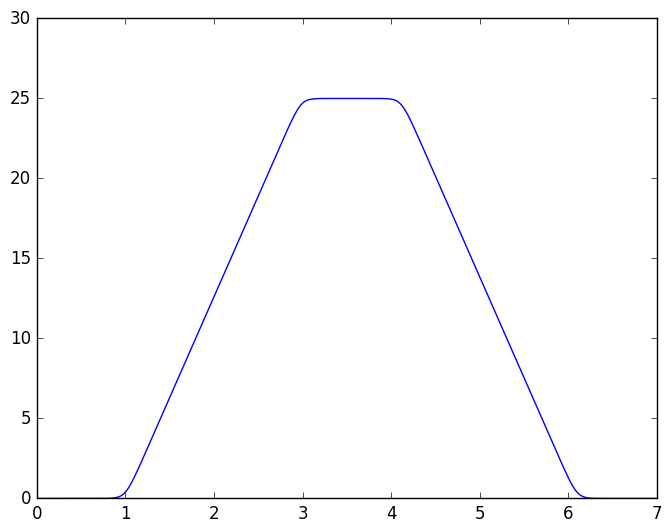

  likely near /home/kiran/.julia/v0.5/IJulia/src/kernel.jl:35
in show at /home/kiran/.julia/v0.5/PyPlot/src/PyPlot.jl


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7eff8c3f1410>

In [3]:
#Nondimensional time
t = 0:0.01:7

#Declare an empty array for pitch angle, same length as time
alpha = zeros(length(t))

#Functional definition of the eldredge function. First argument is amplitude in radians, second is reduced frequency, third is smoothing parameter. 
alphadef = EldRampReturnDef(25*pi/180,0.11,11)

#Generate values of alpha at the times required. 
for i = 1:length(t)
    #Tip : Julia does not benefit from vectorisation like MATLAB. As the code is compiled, it is always better to use full loops   
    alpha[i] = alphadef(t[i])
end
#The PyPlot library in Julia is loaded is loaded with UNSflow and used for plots
plot(t,alpha*180/pi)

#xlabel("Nondimensional time")
#ylabel("alpha (deg)")

#To use latex symbols in the labels, uncomment and try the following: (issues with this, ignore for now)
#xlabel(L"$t^*$")
#ylabel(L"$\alpha$ (deg)")

### Going back to the problem. Define all the kinematics.





In [4]:
#Define pitch angle as described above
alphadef = EldRampReturnDef(25*pi/180,0.11,11)

#Plunge magnitude is constant = 0
hdef = ConstDef(0.)

#Freestream velocity is a constant. Set as constant = 1
udef = ConstDef(1.)

#The full kinematics are collected as:
full_kinem = KinemDef(alphadef, hdef, udef)

UNSflow.KinemDef(UNSflow.EldRampReturnDef(0.4363323129985824,0.11,11.0),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0))

### Define the surface undergoing motion and the flowfield

In [5]:
pvt = 0.0 #leading edge

# The argument "FlatPlate" provides zero camber. To use an airfoil, specify the coordinate file which should be
#in the same folder. For eg. "sd7003.dat". 
#The XFOIL convention must be used for the coordinate: TE->Upper surface->LE->Lower surface->TE
surf = TwoDSurf("FlatPlate", pvt, full_kinem)

curfield = TwoDFlowField()



UNSflow.TwoDFlowField(UNSflow.ConstDef(0.0),UNSflow.ConstDef(0.0),[0.0],[0.0],UNSflow.TwoDVort[],UNSflow.TwoDVort[],UNSflow.TwoDVort[])

### Specify simulation details and run code

In [7]:
#Specify simulation details - time step, and number of steps.
#The default nondimensional timestep is 0.015. There is usually no need to change this. 

time_total = 7. #Required total time
nsteps = Int(round(time_total/0.015))

#Now the code is run as :
#The variables mat, surf and curfield are returned
@time mat, surf, curfield = lautat(surf, curfield, nsteps)


  3.977169 seconds (391.95 k allocations: 69.630 MB, 0.52% gc time)


(
[0.015 3.88004e-12 0.0 1.0 0.0374631 0.228024 -0.00881835 -0.0528606; 0.03 5.39695e-12 0.0 1.0 0.0372845 0.226911 -0.00873445 -0.0525785; 0.045 7.50701e-12 0.0 1.0 0.0371068 0.225806 -0.00865142 -0.0523001; 0.06 1.04421e-11 0.0 1.0 0.0369302 0.22471 -0.00856925 -0.0520254; 0.075 1.45247e-11 0.0 1.0 0.0367545 0.223621 -0.00848793 -0.051754; 0.09 2.02034e-11 0.0 1.0 0.0365799 0.22254 -0.00840745 -0.051486; 0.105 2.81022e-11 0.0 1.0 0.0364062 0.221467 -0.00832781 -0.0512212; 0.12 3.90894e-11 0.0 1.0 0.0362336 0.220402 -0.00824901 -0.0509595; 0.135 5.4372e-11 0.0 1.0 0.0360619 0.219344 -0.00817102 -0.0507008; 0.15 7.56297e-11 0.0 1.0 0.0358912 0.218293 -0.00809386 -0.050445; 0.165 1.05199e-10 0.0 1.0 0.0357215 0.21725 -0.00801749 -0.0501919; 0.18 1.46328e-10 0.0 1.0 0.0355528 0.216214 -0.00794193 -0.0499416; 0.195 2.03538e-10 0.0 1.0 0.035385 0.215184 -0.00786717 -0.0496939; 0.21 2.83114e-10 0.0 1.0 0.0352182 0.214162 -0.00779318 -0.0494487; 0.225 3.93803e-10 0.0 1.0 0.0350524 0.213147 -

### Studying the results

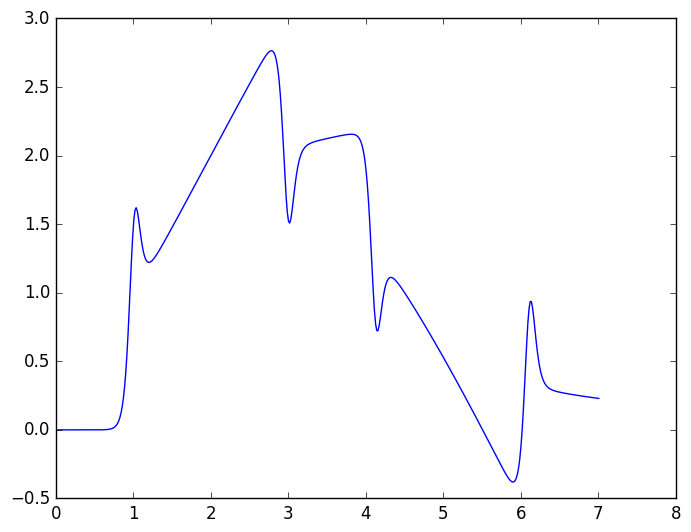

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa02a2a4790>

In [7]:
### Let's look at the simulation results
# surf and curfield refer to the airfoil and the flowfield.
# mat contains quantites of interest -> (time,pitch,plunge,velocity,A0,Cl,Cd,Cm)

#Plot the lift coefficient
plot(mat[:,1],mat[:,6])


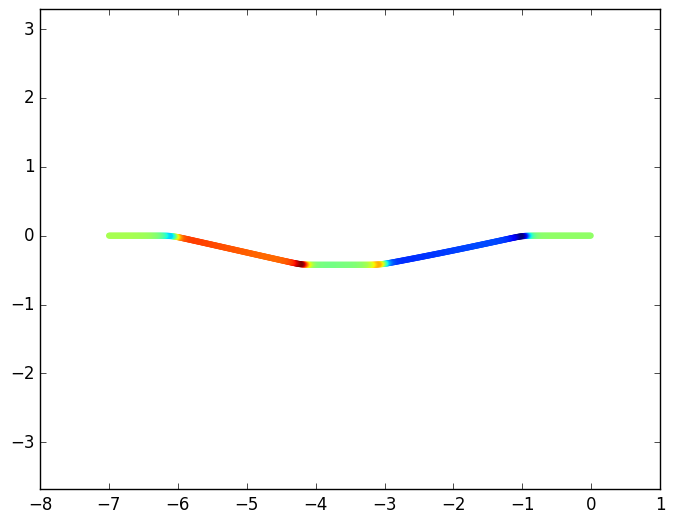

(-8.0,1.0,-0.5,0.10000000000000009)

In [8]:
#Look at the wake with the inbuilt function view_vorts
view_vorts(surf,curfield)
axis("equal")

### Recall that there is no wake rollup in lautat. Another code called lautat_wakeroll implements the same thing with wake rollup. Let's try that. 

In [9]:
#Initialise the surface and flowfield again

surf = TwoDSurf("FlatPlate", pvt, full_kinem)
curfield = TwoDFlowField()

#Run the code with wake rollup
d = lautat_wakeroll(surf, curfield, nsteps)

(
[0.015 3.88004e-12 0.0 1.0 -6.20807e-6 -0.00263201 -2.42165e-10 0.00168206; 0.03 5.39695e-12 0.0 1.0 -6.20806e-6 -6.71366e-5 -2.42155e-10 2.86646e-5; 0.045 7.50701e-12 0.0 1.0 -6.20806e-6 -6.71357e-5 -2.42154e-10 2.86641e-5; 0.06 1.04421e-11 0.0 1.0 -6.20805e-6 -6.71344e-5 -2.42154e-10 2.86634e-5; 0.075 1.45247e-11 0.0 1.0 -6.20803e-6 -6.71326e-5 -2.42153e-10 2.86624e-5; 0.09 2.02034e-11 0.0 1.0 -6.20801e-6 -6.71301e-5 -2.42152e-10 2.8661e-5; 0.105 2.81022e-11 0.0 1.0 -6.20798e-6 -6.71267e-5 -2.4215e-10 2.86592e-5; 0.12 3.90894e-11 0.0 1.0 -6.20794e-6 -6.71219e-5 -2.42148e-10 2.86565e-5; 0.135 5.4372e-11 0.0 1.0 -6.20789e-6 -6.71152e-5 -2.42144e-10 2.86529e-5; 0.15 7.56297e-11 0.0 1.0 -6.20781e-6 -6.7106e-5 -2.4214e-10 2.86478e-5; 0.165 1.05199e-10 0.0 1.0 -6.20771e-6 -6.70931e-5 -2.42134e-10 2.86408e-5; 0.18 1.46328e-10 0.0 1.0 -6.20756e-6 -6.70752e-5 -2.42125e-10 2.8631e-5; 0.195 2.03538e-10 0.0 1.0 -6.20736e-6 -6.70502e-5 -2.42113e-10 2.86173e-5; 0.21 2.83114e-10 0.0 1.0 -6.20707e

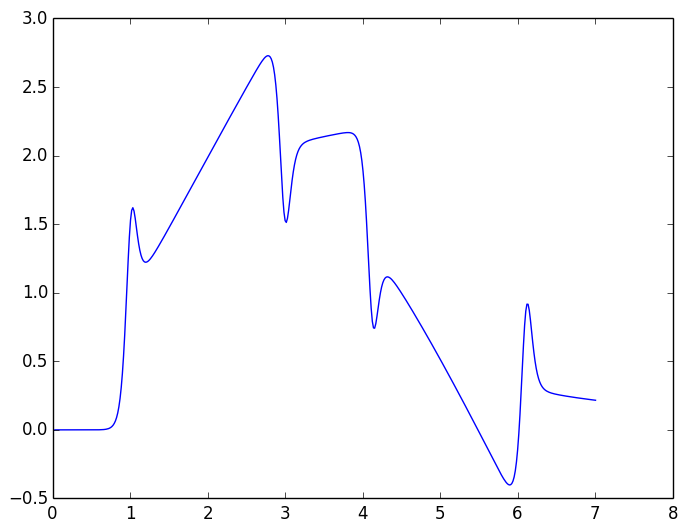

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31c595cd0>

In [10]:
#Plot the lift coefficient
plot(mat[:,1],mat[:,6])

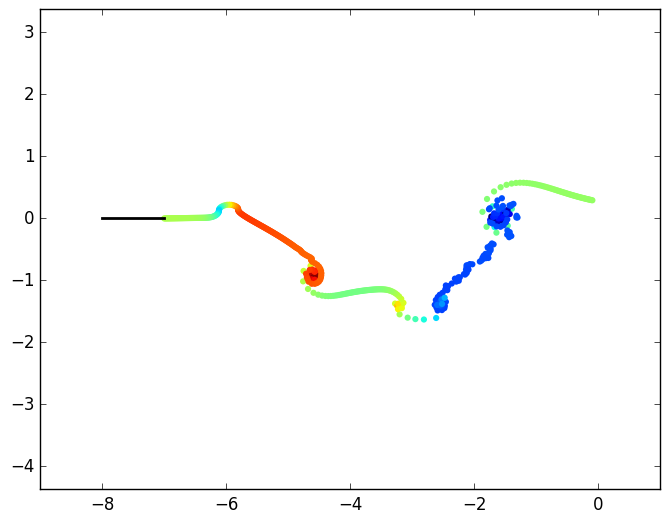

(-9.0,1.0,-2.0,1.0)

In [10]:
#Look at the wake with the inbuilt function view_vorts
view_vorts(surf,curfield)
axis("equal")